# COE379L Project 3: Data Preprocessing and Exploratory Data Analysis

## Cross-Model Comparison for News Topic Classification

This notebook covers:
- Loading the AG News dataset from Hugging Face
- Data preprocessing (combining title and description)
- Exploratory Data Analysis (EDA)
- Data visualization and statistics


## 1. Import Required Libraries


In [6]:
# Standard library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Hugging Face datasets
from datasets import load_dataset

# Set style for visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")


Libraries imported successfully!


## 2. Load AG News Dataset


In [7]:
# The code below was generated by AI; see [1] in Use_of_AI.md
# Load AG News dataset from Hugging Face
print("Loading AG News dataset...")
dataset = load_dataset("ag_news")

# Extract train and test splits
train_data = dataset['train']
test_data = dataset['test']

print(f"Training samples: {len(train_data)}")
print(f"Test samples: {len(test_data)}")
print(f"\nDataset features: {train_data.features}")


Loading AG News dataset...
Training samples: 120000
Test samples: 7600

Dataset features: {'text': Value('string'), 'label': ClassLabel(names=['World', 'Sports', 'Business', 'Sci/Tech'])}


## 3. Convert to Pandas DataFrames


In [8]:
# Convert to pandas DataFrames for easier manipulation
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

print("Training DataFrame shape:", train_df.shape)
print("Test DataFrame shape:", test_df.shape)
print("\nTraining DataFrame columns:", train_df.columns.tolist())
print("\nFirst few rows:")
train_df.head()


Training DataFrame shape: (120000, 2)
Test DataFrame shape: (7600, 2)

Training DataFrame columns: ['text', 'label']

First few rows:


,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2


## 4. Data Preprocessing: Combine Title and Description

According to the project requirements, we need to combine the title and description fields into a single text input for classification consistency across all models.


In [9]:
# The code below was generated by AI; see [2] in Use_of_AI.md
# Note: AG News dataset has a single 'text' field that already contains title and description
# The format is typically "Title. Description" - we'll use it directly as combined_text
def prepare_text_field(df):
    """
    Prepare text field for classification.
    The AG News dataset 'text' field already contains title and description combined.
    
    Args:
        df: DataFrame with 'text' column
    
    Returns:
        DataFrame with 'combined_text' column
    """
    df = df.copy()
    
    # Use the text field directly as combined_text (it already contains title + description)
    df['combined_text'] = df['text'].astype(str)
    
    # Remove any extra whitespace
    df['combined_text'] = df['combined_text'].str.strip()
    
    return df

# Apply to both train and test sets
train_df = prepare_text_field(train_df)
test_df = prepare_text_field(test_df)

print("Text fields prepared successfully!")
print("\nSample combined text:")
print(train_df['combined_text'].iloc[0][:200] + "...")


Text fields prepared successfully!

Sample combined text:
Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again....


## 5. Dataset Overview and Class Distribution


In [10]:
# Class labels mapping
class_labels = {0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'}

# Add label names to DataFrames
train_df['label_name'] = train_df['label'].map(class_labels)
test_df['label_name'] = test_df['label'].map(class_labels)

# Display class distribution
print("=== Training Set Class Distribution ===")
train_dist = train_df['label_name'].value_counts().sort_index()
print(train_dist)
print(f"\nTotal: {len(train_df)}")

print("\n=== Test Set Class Distribution ===")
test_dist = test_df['label_name'].value_counts().sort_index()
print(test_dist)
print(f"\nTotal: {len(test_df)}")


=== Training Set Class Distribution ===
label_name
Business    30000
Sci/Tech    30000
Sports      30000
World       30000
Name: count, dtype: int64

Total: 120000

=== Test Set Class Distribution ===
label_name
Business    1900
Sci/Tech    1900
Sports      1900
World       1900
Name: count, dtype: int64

Total: 7600


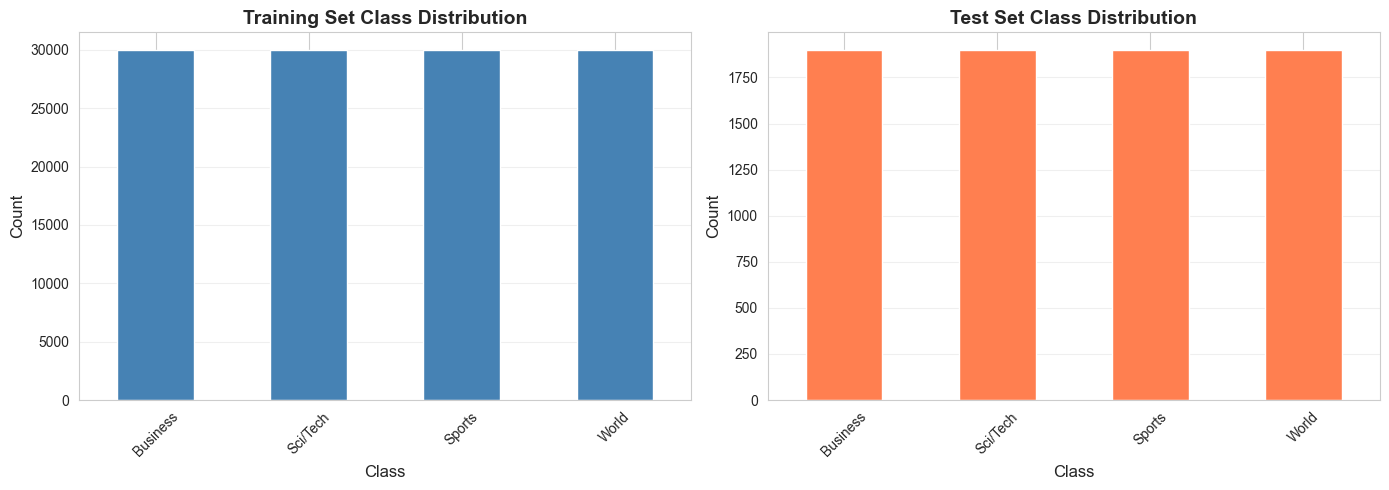

In [11]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set
train_dist.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Training Set Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Test set
test_dist.plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Test Set Class Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Class', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## 6. Text Statistics


In [12]:
# Calculate text length statistics
train_df['text_length'] = train_df['combined_text'].str.len()
train_df['word_count'] = train_df['combined_text'].str.split().str.len()

test_df['text_length'] = test_df['combined_text'].str.len()
test_df['word_count'] = test_df['combined_text'].str.split().str.len()

print("=== Training Set Text Statistics ===")
print(f"Mean text length (characters): {train_df['text_length'].mean():.2f}")
print(f"Median text length (characters): {train_df['text_length'].median():.2f}")
print(f"Mean word count: {train_df['word_count'].mean():.2f}")
print(f"Median word count: {train_df['word_count'].median():.2f}")

print("\n=== Test Set Text Statistics ===")
print(f"Mean text length (characters): {test_df['text_length'].mean():.2f}")
print(f"Median text length (characters): {test_df['text_length'].median():.2f}")
print(f"Mean word count: {test_df['word_count'].mean():.2f}")
print(f"Median word count: {test_df['word_count'].median():.2f}")


=== Training Set Text Statistics ===
Mean text length (characters): 236.35
Median text length (characters): 232.00
Mean word count: 37.85
Median word count: 37.00

=== Test Set Text Statistics ===
Mean text length (characters): 235.18
Median text length (characters): 231.00
Mean word count: 37.72
Median word count: 37.00


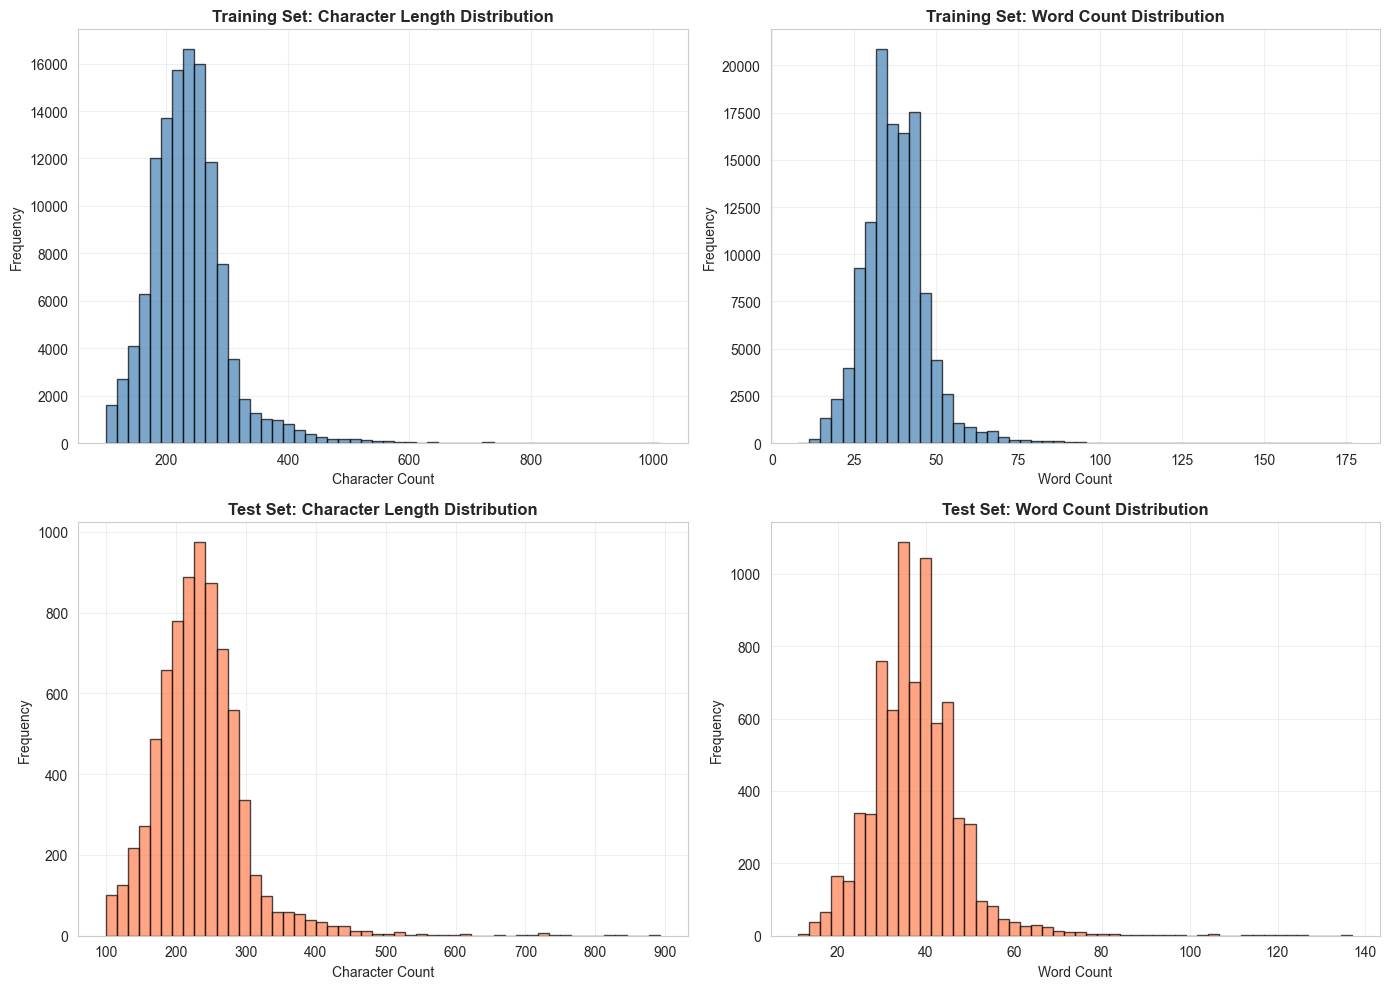

In [13]:
# Visualize text length distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Character length distribution - Training
axes[0, 0].hist(train_df['text_length'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Training Set: Character Length Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Character Count', fontsize=10)
axes[0, 0].set_ylabel('Frequency', fontsize=10)
axes[0, 0].grid(alpha=0.3)

# Word count distribution - Training
axes[0, 1].hist(train_df['word_count'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Training Set: Word Count Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Word Count', fontsize=10)
axes[0, 1].set_ylabel('Frequency', fontsize=10)
axes[0, 1].grid(alpha=0.3)

# Character length distribution - Test
axes[1, 0].hist(test_df['text_length'], bins=50, color='coral', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Test Set: Character Length Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Character Count', fontsize=10)
axes[1, 0].set_ylabel('Frequency', fontsize=10)
axes[1, 0].grid(alpha=0.3)

# Word count distribution - Test
axes[1, 1].hist(test_df['word_count'], bins=50, color='coral', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Test Set: Word Count Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Word Count', fontsize=10)
axes[1, 1].set_ylabel('Frequency', fontsize=10)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


## 7. Sample Data Examples


In [14]:
# Display sample examples from each class
print("=== Sample Examples from Each Class ===\n")

for label, label_name in class_labels.items():
    sample = train_df[train_df['label'] == label].iloc[0]
    print(f"Class: {label_name} (Label: {label})")
    print(f"Text: {sample['combined_text'][:200]}...")
    print(f"Word Count: {sample['word_count']}")
    print("-" * 80)
    print()


=== Sample Examples from Each Class ===

Class: World (Label: 0)
Text: Venezuelans Vote Early in Referendum on Chavez Rule (Reuters) Reuters - Venezuelans turned out early\and in large numbers on Sunday to vote in a historic referendum\that will either remove left-wing P...
Word Count: 46
--------------------------------------------------------------------------------

Class: Sports (Label: 1)
Text: Phelps, Thorpe Advance in 200 Freestyle (AP) AP - Michael Phelps took care of qualifying for the Olympic 200-meter freestyle semifinals Sunday, and then found out he had been added to the American tea...
Word Count: 64
--------------------------------------------------------------------------------

Class: Business (Label: 2)
Text: Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again....
Word Count: 21
--------------------------------------------------------------------------------

Class: Sci/Tech (L

## 8. Save Preprocessed Data


In [15]:
# Save preprocessed data for use in other notebooks
# Keep only essential columns: label, combined_text
train_processed = train_df[['label', 'combined_text']].copy()
test_processed = test_df[['label', 'combined_text']].copy()

# Save to CSV files
train_processed.to_csv('data/train_processed.csv', index=False)
test_processed.to_csv('data/test_processed.csv', index=False)

print("Preprocessed data saved to data/ directory!")
print(f"Training samples: {len(train_processed)}")
print(f"Test samples: {len(test_processed)}")


Preprocessed data saved to data/ directory!
Training samples: 120000
Test samples: 7600


## 9. Summary


In [16]:
print("=== Dataset Summary ===")
print(f"\nTraining Set:")
print(f"  - Total samples: {len(train_df):,}")
print(f"  - Classes: {len(class_labels)}")
print(f"  - Average text length: {train_df['text_length'].mean():.1f} characters")
print(f"  - Average word count: {train_df['word_count'].mean():.1f} words")

print(f"\nTest Set:")
print(f"  - Total samples: {len(test_df):,}")
print(f"  - Classes: {len(class_labels)}")
print(f"  - Average text length: {test_df['text_length'].mean():.1f} characters")
print(f"  - Average word count: {test_df['word_count'].mean():.1f} words")

print("\n✓ Data preprocessing complete!")
print("✓ Ready for model training in subsequent notebooks.")


=== Dataset Summary ===

Training Set:
  - Total samples: 120,000
  - Classes: 4
  - Average text length: 236.4 characters
  - Average word count: 37.8 words

Test Set:
  - Total samples: 7,600
  - Classes: 4
  - Average text length: 235.2 characters
  - Average word count: 37.7 words

✓ Data preprocessing complete!
✓ Ready for model training in subsequent notebooks.
